In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fire_distances_csv = 'fire_distances.csv'
fire_distances_csv_path = r'C:\Users\clark.roll\python coding\code_personal\Data512\Course Project\Part 1\intermediate files'
csv_filepath = os.path.join(fire_distances_csv_path, fire_distances_csv)
distance_df = pd.read_csv(csv_filepath)

In [4]:
# Filter fires up to by mileage away for plots
distance_1800 = distance_df[distance_df['closest_distance_miles'] <= 1800].copy()

distance_650  = distance_df[distance_df['closest_distance_miles'] <= 650].copy()

In [5]:
## Set some basic plotting aesthetics
sns.set_style("whitegrid")

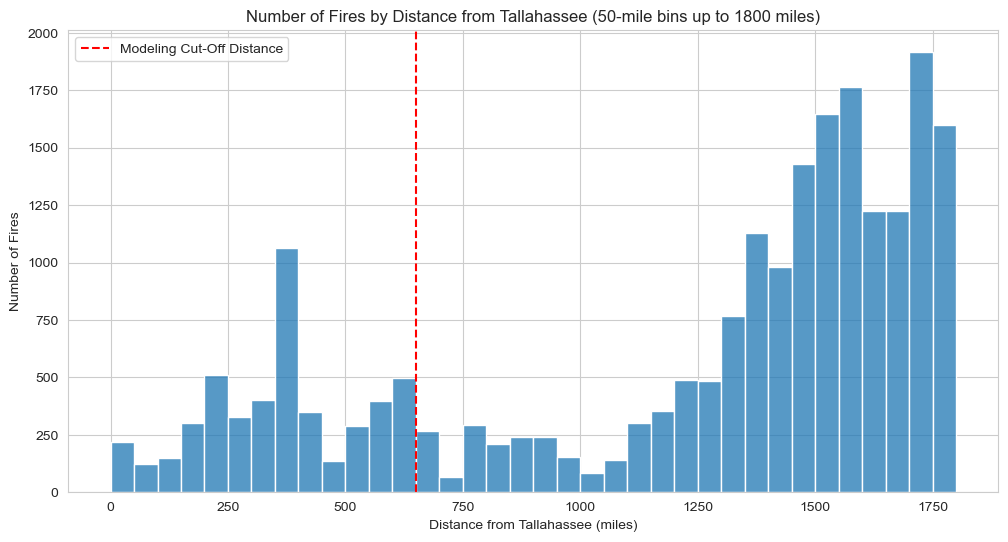

In [6]:
# Create 50-mile distance bins
bins = range(0, 1850, 50)  # Bins go from 0 to 1800 in increments of 50
distance_1800['distance_bin'] = pd.cut(distance_1800['closest_distance_miles'], bins=bins)

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(distance_1800, x='closest_distance_miles', bins=bins, kde=False)
plt.axvline(x=650, color='red', linestyle='--', label='Modeling Cut-Off Distance')
plt.xlabel('Distance from Tallahassee (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Distance from Tallahassee (50-mile bins up to 1800 miles)')
plt.legend()
plt.show()

In [7]:
distance_650

,usgs_assigned_id,fire_year,fire_dates,fire_name,fire_size_acres,fire_type,closest_distance_miles,closest_point_lat,closest_point_lon,average_distance_miles
281,14136,1962,Listed Wildfire Discovery Date(s): 1962-05-06 ...,CHESTNUT (2),35.202575,Wildfire,351.988938,35.544441,-83.671304,352.142859
604,15037,1965,Listed Wildfire Discovery Date(s): 1965-10-30 ...,ABRAMS MTN (2),3.978242,Wildfire,638.127917,38.416492,-78.525652,638.173126
607,15043,1965,Listed Wildfire Discovery Date(s): 1965-07-31 ...,SANDY BOTT (2),1.989492,Wildfire,632.963293,38.349929,-78.569951,632.995264
613,15068,1965,Listed Wildfire Discovery Date(s): 1965-08-17 ...,LEWIS PEAK (2),0.248821,Wildfire,624.331963,38.284134,-78.735446,624.343268
900,15812,1967,Listed Wildfire Discovery Date(s): 1967-07-20 ...,OAK TREE (2),0.099457,Wildfire,644.479181,38.488166,-78.450795,644.486330
...,...,...,...,...,...,...,...,...,...,...
53707,127563,2020,Listed Prescribed Fire Start Date(s): 2020-10-...,Big Sandy Creek Reduction/Restoration - Big Sa...,55.162795,Prescribed Fire,621.721535,30.617703,-94.678963,621.942908
53715,127578,2020,Listed Prescribed Fire Start Date(s): 2020-10-...,NCMCR-FUELS PROJECT - NCMCR-FY21-RX-Prescribed...,48.983944,Prescribed Fire,632.550225,36.496457,-75.988541,632.771282
53727,127639,2020,Listed Prescribed Fire Start Date(s): 2020-10-...,NCMCR-FUELS PROJECT - NCMCR-FY21-RX-Prescribed...,29.030614,Prescribed Fire,633.719312,36.527569,-75.992594,633.821747
53736,127711,2020,Listed Prescribed Fire Start Date(s): 2020-06-...,BIA - IMM_RX_WUI_20 (2),20.396333,Prescribed Fire,327.933036,26.408902,-81.417119,328.057588


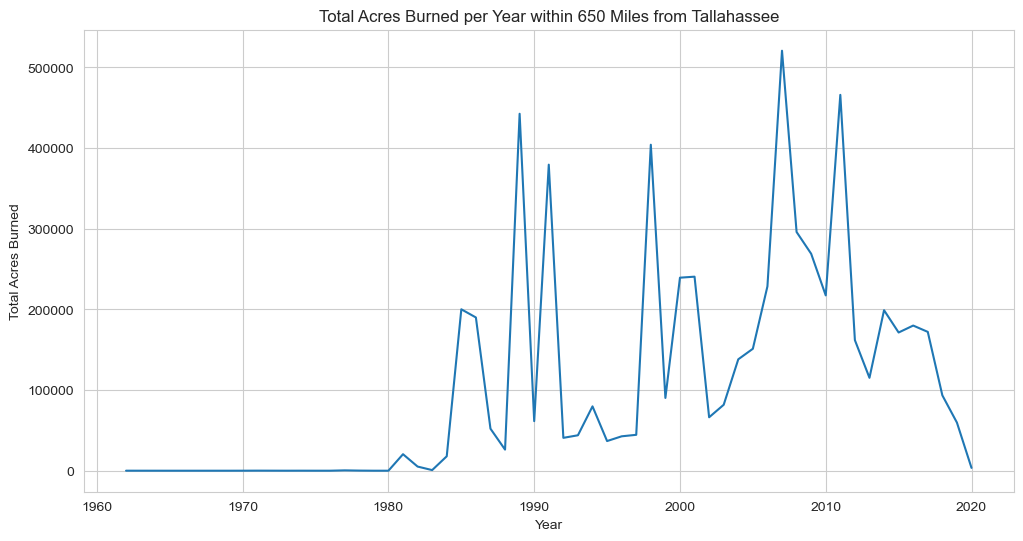

In [7]:
# Assuming 'fire_data' has 'Fire_Year' and 'GIS_Acres' columns

# Group by year to calculate total acres burned per year
total_acres_per_year = distance_650.groupby('fire_year')['fire_size_acres'].sum().reset_index()

# Plot time series of total acres burned per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_acres_per_year, x='fire_year', y='fire_size_acres')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned per Year within 650 Miles from Tallahassee')
plt.show()